# Image Compression Performance

Overall performance of my image display widget based on HTML `Canvas` element is very much dependent on choices made for compression and decompression.  It takes time to compress the image, transfer from back-end to front-end, then decompress and display.  I want to measure the round-trip times for this process with server and client both running on my laptop.

In [284]:
from __future__ import print_function, unicode_literals, division, absolute_import

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
import PIL
import IPython

from tictoc import Timer

from widget_canvas import widget_canvas

## Helper Functions

In [204]:
def time_compress(func, *args, **kwargs):
    num = 50
    time_best = np.inf
    out_best = None
    
    for k in range(num):
        with Timer(verbose=False) as timer:
            out = func(*args, **kwargs)
            
        if timer.time < time_best:
            time_best = timer.time
            out_best = out
    
    time_ms = time_best * 1.e3
    size_kb = len(out_best)/1024
    
    return time_ms, size_kb

## Load the Data

In [185]:
data_doberman = imageio.imread('images/Doberman.jpg')
data_whippet = imageio.imread('images/Whippet.jpg')

template = 'Time: {:.1f} ms,  Size: {:.1f} KB'

## PNG

In [186]:
fmt = 'png'

In [187]:
t, s = time_compress(imageio.imwrite,
                     imageio.RETURN_BYTES, data_doberman,
                     format=fmt)

print(template.format(t, s))

Time: 25.3 ms,  Size: 131.4 KB


## JPEG

http://imageio.readthedocs.org/en/latest/format_jpeg.html#jpeg

In [297]:
fmt = 'jpg'
quality = 90

In [298]:
t, s = time_compress(imageio.imwrite,
                     imageio.RETURN_BYTES, data_doberman,
                     format=fmt, quality=quality, optimize=False, baseline=False)

print(template.format(t, s))

Time: 3.2 ms,  Size: 25.0 KB


In [285]:
PIL.PILLOW_VERSION

'2.9.0'

## WEBP

In [291]:
fmt = 'webp'

In [292]:
t, s = time_compress(imageio.imwrite,
                     imageio.RETURN_BYTES, data_doberman,
                     format=fmt)

print(template.format(t, s))

Time: 36.2 ms,  Size: 10.3 KB


## JPEG at Various Qualities

In [287]:
qualities = [100, 99, 98, 97, 96, 95, 93, 90, 85, 80, 70, 60, 50]

In [288]:
results = []
for Q in qualities:
    ts = time_compress(imageio.imwrite,
                         imageio.RETURN_BYTES, data_doberman,
                         format=fmt, quality=Q, optimize=False, baseline=False)
    results.append(ts)
results = np.asarray(results).T

results_A = results

In [289]:
results = []
for Q in qualities:
    ts = time_compress(imageio.imwrite,
                         imageio.RETURN_BYTES, data_doberman,
                         format=fmt, quality=Q, optimize=True, baseline=True)
    results.append(ts)
results = np.asarray(results).T

results_C = results

## Nice Plots

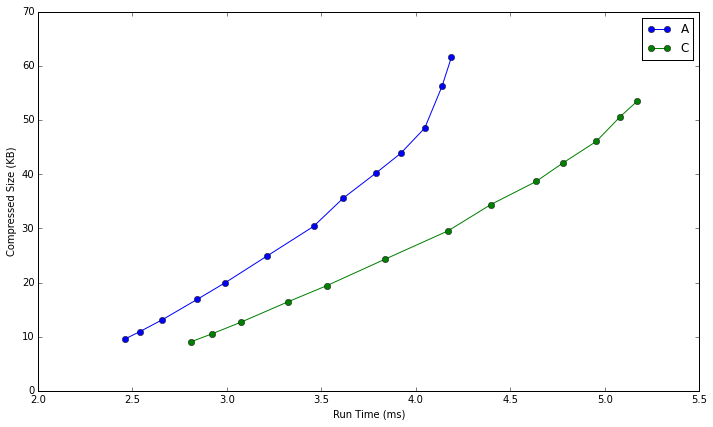

In [290]:
fig, ax = plt.subplots(figsize=(10, 6))

ts, ss = results_A
ax.plot(ts, ss, '-o', label='A')

ts, ss = results_C
ax.plot(ts, ss, '-o', label='C')

ax.set_xlabel('Run Time (ms)')
ax.set_ylabel('Compressed Size (KB)')
ax.set_xlim(2., 5.5)
ax.set_ylim(0, 70)
ax.legend(loc=0)

plt.tight_layout()

In [43]:
t

Run time: 3.815 us

In [11]:
import time
reload(canvas.image)

quality = 90

data_set = canvas.image.setup_data(data_whippet)  #doberman)

mode = canvas.image.determine_mode(data_set)

t0 = time.time()
fmt = 'png'
data_png, fmt = canvas.image.compress(data_set, mode, fmt, optimize=True)
t1 = time.time()
dt_png = t1 - t0

print(fmt)

# fmt = 'jpeg2000'
# data_j2k, fmt = canvas.image.compress(data_set, mode, fmt)
# t2 = time.time()
# dt_j2k = t2 - t1

fmt = 'jpeg'
data_jpeg, fmt = canvas.image.compress(data_set, mode, fmt, quality=quality, optimize=True)
t3 = time.time()
dt_jpeg = t3 - t1
print(fmt)


fmt = 'webp'
data_webp, fmt = canvas.image.compress(data_set, mode, fmt, quality=quality)
t4 = time.time()

dt_webp = t4 - t3
print(fmt)


data_b64 = base64.b64encode(data_jpeg)
t5 = time.time()

dt_b64 = t5 - t4
print(fmt)


print('{:6d} @ {:.3f}'.format(len(data_png), dt_png))
# print('{:6d} @ {:.3f}'.format(len(data_j2k), dt_j2k))
print('{:6d} @ {:.3f}'.format(len(data_jpeg), dt_jpeg))
print('{:6d} @ {:.3f}'.format(len(data_webp), dt_webp))
print('{:6d} @ {}'.format(len(data_b64), dt_b64))


png
jpeg


KeyError: u'WEBP'

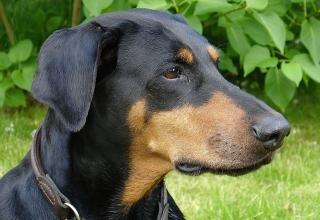

In [33]:
IPython.display.display_png(data_comp, raw=True)

In [9]:
# Make the widget and display it to the screen.
wid = canvas.CanvasWidget()
wid.src = src_elephant

# wid.height = 100
# wid.width = 100

Here's a thought: forget about managing separate values for canvas sizes and for CSS sizes.  Let's assume that CSS sizes are always forced to be the same as the canvas sizes.  Any manipulating is to be done with canvas and with transform.

## Decode compressed image

- Decoder: https://github.com/notmasteryet/jpgjs
- Encoder: https://code.google.com/p/as3corelib/source/browse/trunk/src/com/adobe/images/JPGEncoder.as
- Combined: https://github.com/eugeneware/jpeg-js/blob/master/lib/decoder.js
  
  This package is apparently meant for Node.js.  It looks so simple, should work fine for browser??   Focus for now on just decoding.  Here is an example:
  
```js
var jpegData = fs.readFileSync('grumpycat.jpg');
var rawImageData = jpeg.decode(jpegData);
```


## Working with Blobs


## Construct new, empty data array

https://developer.mozilla.org/en-US/docs/Web/API/Uint8Array

```js
var num_pixels = num_lines * num_samples
var a = new Uint8Array(num_pixels)
```

In [16]:
%%javascript
console.log('sdf')


// File API: http://www.w3.org/TR/file-upload/

// http://www.html5rocks.com/en/tutorials/file/dndfiles/
// var fi = new File()

var fileSelector = document.createElement('input');
 fileSelector.setAttribute('type', 'file');

 var selectDialogueLink = document.createElement('a');
 selectDialogueLink.setAttribute('href', '');
 selectDialogueLink.innerText = "Select File";

 selectDialogueLink.onclick = function () {
      fileSelector.click();
      return false;
 }

 document.body.appendChild(selectDialogueLink);


<IPython.core.display.Javascript object>